In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("practice.ipynb")

In [2]:
import practice_test

# Lab-P9:  Plotting and Sorting

# Learning Objectives:

In this lab, you will practice how to...
* Create simple plots from dictionaries
* Sort dictionaries by keys and values
* Use bucketizing to obtain useful data structures
* Use comprehensions to create lists and dictionaries

## Note on Academic Misconduct:

**IMPORTANT**: p8 and p9 are two parts of the same data analysis. You **cannot** switch project partners between these two projects. That is if you partnered up with someone for p8, you have to work on lab-p9 and p9 with the **same partner**. You must acknowledge to the lab TA to receive lab attendance credit.

You may do these lab exercises with only with your project partner; you are not allowed to start working on lab-p9 with one person, then do the project with a different partner.  Now may be a good time to review [our course policies](https://cs220.cs.wisc.edu/f22/syllabus.html).

## Introduction:

In lab-p8 and p8, you learnt to parse the `mapping.csv` and `movies.csv` datasets. In p9, you will be analyzing the movies dataset using the data structures you created in p8. In lab-p9, you will create some useful helper functions that will be needed in p9, and you will also learn to create bar plots.

In order to create bar plots, you will use two new packages: `matplotlib` and `pandas`. Import them below.

In [6]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# please place all your import statements in this cell if you need to import any more modules for this project
import matplotlib
import pandas

## Segment 2: Plotting Dictionaries

### Task 2.1: Understand how `plot_dict` works

**Creating a dictionary** will often be the first step towards creating a bar plot in Python. In particular, each dictionary **key** might correspond to a **category** (along the *x-axis*), and each **value** might correspond to an **amount** (along the *y-axis*). To setup plotting in Python, run the following cell:

In [7]:
def plot_dict(d, label="Please Label Me!"):
    """plot_dict(d, label) creates a bar plot using the 
    dictionary 'd' and labels the y-axis as 'label'"""
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

Let's try creating a simple dictionary and using it to create a bar plot with the `plot_dict` function:

In [8]:
# create a dictionary mapping different players to their goals scored
goals = {"Ada Lovelace": 5, "Rose Lavelle": 22, "Marta Vieira da Silva": 113}
goals

{'Ada Lovelace': 5, 'Rose Lavelle': 22, 'Marta Vieira da Silva': 113}

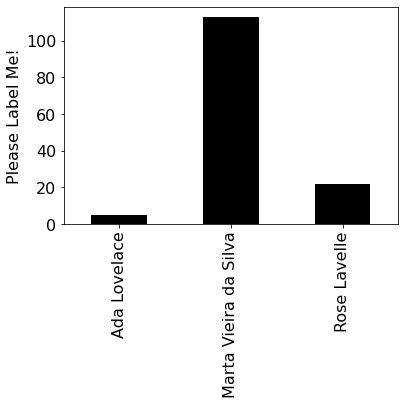

In [9]:
# create a bar plot from the data in the dictionary 'goals'
plot_dict(goals)

Since p9 is all about the movies dataset, we will now work on a **list** of movie **dictionaries**, similar to the one you created in p8. If you haven't completed p8, don't worry! The variable has been defined below and you do not need to copy any p8 code over. Run the cell below to define the variable `movies_data`. Note that this is a **list** of **dictionaries** in the same format the **list** `movies` that you defined in p8 (and will work with, in p9).

**Important**: We define the variable directly in order to save time and simplify the lab exercises. Do NOT hardcode values of variables storing the dataset in p9. Instead use the appropriate functions to load the data from the corresponding CSV files.

In [10]:
movies_data = [{'title': 'The Trees of the East',
  'year': 2018,
  'duration': 71,
  'genres': ['Thriller'],
  'rating': 9.8,
  'directors': ['Mike Ellwood'],
  'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']},
{'title': 'Avengers: Infinity War',
  'year': 2018,
  'duration': 149,
  'genres': ['Action', 'Adventure', 'Sci-Fi'],
  'rating': 8.4,
  'directors': ['Anthony Russo', 'Joe Russo'],
  'cast': ['Robert Downey Jr.', 'Chris Hemsworth', 'Mark Ruffalo', 'Chris Evans']},
{'title': 'Zodiac',
  'year': 2007,
  'duration': 157,
  'genres': ['Crime', 'Drama', 'Mystery'],
  'rating': 7.7,
  'directors': ['David Fincher'],
  'cast': ['Jake Gyllenhaal', 'Robert Downey Jr.', 'Mark Ruffalo', 'Anthony Edwards']},
{'title': 'Top Gun: Maverick',
  'year': 2022,
  'duration': 130,
  'genres': ['Action', 'Drama'],
  'rating': 8.4,
  'directors': ['Joseph Kosinski'],
  'cast': ['Tom Cruise', 'Jennifer Connelly', 'Miles Teller', 'Val Kilmer']},
{'title': 'Space Jam: A New Legacy',
  'year': 2021,
  'duration': 115,
  'genres': ['Adventure', 'Animation', 'Comedy'],
  'rating': 4.5,
  'directors': ['Malcolm D. Lee'],
  'cast': ['LeBron James', 'Don Cheadle', 'Cedric Joe', 'Khris Davis']},
{'title': 'The Big Short',
  'year': 2015,
  'duration': 130,
  'genres': ['Biography', 'Comedy', 'Drama'],
  'rating': 7.8,
  'directors': ['Adam McKay'],
  'cast': ['Christian Bale', 'Steve Carell', 'Ryan Gosling', 'Brad Pitt']}]

### Task 2.2: Map necessary details into a dictionary

As you can see, `movies_data` is a **list** of **dictionaries** where each **dictionary** stores information on a particular movie.

Using the `plot_dict` function, we will now create a **bar plot** that compares the `duration` of each movie in `movies_data`. The *x-axis* will contain the `title` of each movie and your *y-axis* will be the `duration`.

In [11]:
# create the dictionary first
plot_movies_data = {}
for movie in movies_data:
    plot_movies_data[movie['title']] = movie['duration']
    
plot_movies_data

{'The Trees of the East': 71,
 'Avengers: Infinity War': 149,
 'Zodiac': 157,
 'Top Gun: Maverick': 130,
 'Space Jam: A New Legacy': 115,
 'The Big Short': 130}

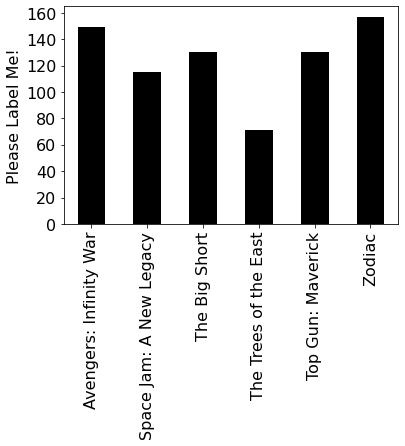

In [12]:
# then plot the dictionary
plot_dict(plot_movies_data)

Notice that in this plot, the *y-axis* is missing a label; that can be specified with the **optional** second argument to `plot_dict`.

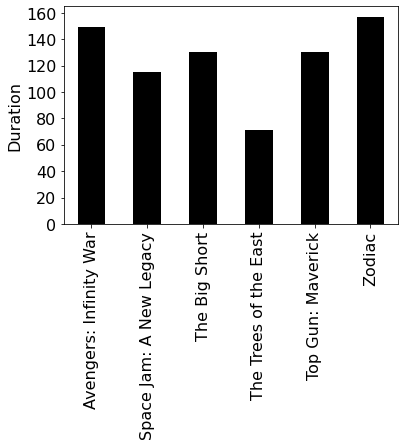

In [13]:
# provide the y-axis label as the second argument
plot_dict(plot_movies_data, 'Duration')

You are now ready to create your own bar plots in p9!

## Segment 3: Creating a Dictionary with Custom Keys

### Task 3.1: Convert years to their decades

### Function 1: `year_to_decade(year)`

First, we are going to write the `year_to_decade` function. Given a year, this function returns a string that represents the decade that year belongs to. Here are some sample calls and the expected output:

- `year_to_decade(2003)` **must** return `'2001 to 2010'`
- `year_to_decade(2000)` **must** return `'1991 to 2000'`

Complete the code below. 

In [18]:
# replace the ... with your code

def year_to_decade(year):
    if year % 10 == 0:
        decade = str(year - 9) + ' to ' + str(year)
    else:
        start = year - year % 10 + 1
        decade = str(start) + ' to ' + str(start + 9)
        
        # TODO: first find the year in which the decade starts
        #       when year % 10 == 0
        # TODO: define the variable 'decade'
    return decade

**Question 1**: Which **decade** does the `year` *2000* belong to?

In [24]:
# compute and store the answer in the variable 'decade_2000', then display it
decade_2000 = year_to_decade(2000)

In [25]:
grader.check("q1")

q1 results: All test cases passed!

**Question 2**: Which **decade** does the `year` *1843* belong to?

In [26]:
# compute and store the answer in the variable 'decade_1843', then display it
decade_1843 = year_to_decade(1843)

In [27]:
grader.check("q2")

q2 results: All test cases passed!

### Task 3.2: Create new dictionaries with custom keys and values

**Question 3**: Create a new **dictionary** that has the `title` of each movie in `movies_data` as a **key** and the **decade** it was released in as the corresponding **value**.

You **must** use the `year_to_decade` function to create this **dictionary**.

In [32]:
# compute and store the answer in the variable 'movies_with_decade', then display it
movies_with_decade = {}

for idx in range(len(movies_data)):
    title = movies_data[idx]["title"]
    decade = movies_data[idx]["year"]
    movies_with_decade[title] = year_to_decade(decade)


In [33]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4**: Calculate the **average** `rating` of movies in the **decade** *2011 to 2020*.

**Hint:** You can loop through `movies_data` for each movie and use `movies_with_decade` to check which **decade** each movie is from.

In [37]:
# compute and store the answer in the variable 'avg_rating_2011_2020', then display it
rating = 0
count = 0

for idx in range (len(movies_data)):
    if year_to_decade(movies_data[idx]["year"]) == "2011 to 2020":
        count += 1
        rating += movies_data[idx]["rating"] 
avg_rating_2011_2020 = rating / count
avg_rating_2011_2020

8.666666666666668

In [38]:
grader.check("q4")

q4 results: All test cases passed!

## Segment 4: Sorting Dictionaries

It would be useful if we could somehow **sort** **dictionaries**. Recall however, that Python does not distinguish between two dictionaries which have keys stored in different orders. To test this, run the following cell:

In [39]:
# two dictionaries with the same key/value pairs in different orders
dict_a = {'C': 'S', 2: 20}
dict_b = {2: 20, 'C': 'S'}

# test if dict_a and dict_b store the same value
dict_a == dict_b

True

Therefore, if we want to **sort** the data stored in a **dictionary**, you must *first* typecast it into some other data type, which has an order. One way to do this is to **convert** it into a **list** of **tuples**, and then **sort** the **list**. The **dict.items()** method will be useful for us here.

In Task 2.2, we created the variable `plot_movies_data`. It looks like this:

```python
{'The Trees of the East': 71,
 'Avengers: Infinity War': 149,
 'Zodiac': 157,
 'Top Gun: Maverick': 130,
 'Space Jam: A New Legacy': 115,
 'The Big Short': 130}
```

Here's what `list(plot_movies_data.items())` looks like:
```python
[('The Trees of the East', 71),
 ('Avengers: Infinity War', 149),
 ('Zodiac', 157),
 ('Top Gun: Maverick', 130),
 ('Space Jam: A New Legacy', 115),
 ('The Big Short', 130)]
```
This **list** of **tuples** can now be sorted.

### Task 4.1: Sort `plot_movies_data` by title

We will start simple by **sorting** the **dictionary** by the `title`.

**Question 5**: Sort the `plot_movies_data` **dictionary** in alphabetical order of the `title`.

**Hint:** Note that in each **tuple**, the `title` appears at index *0* followed by the `duration` at index *1*. By default, when you **sort** a **list** of **tuples**, you will **sort** the **tuples** by the values at index *0*. So, you can answer this question by just **sorting** the **list** of **items** in `plot_movies_data`.

In [43]:
# replace the ... with your code

sorted_plot_movies_data = sorted(plot_movies_data.items())

sorted_plot_movies_data

[('Avengers: Infinity War', 149),
 ('Space Jam: A New Legacy', 115),
 ('The Big Short', 130),
 ('The Trees of the East', 71),
 ('Top Gun: Maverick', 130),
 ('Zodiac', 157)]

In [44]:
grader.check("q5")

q5 results: All test cases passed!

### Task 4.2: Sort `plot_movies_data` by `duration`

Note that by default, the **tuples** were sorted by the value at index *0*, which was also the **key** of the **dictionary**. This time, let us try to **sort** the **dictionary** by its **values**. i.e. we want to sort the movies in **ascending order** of their `durations`.

To **sort** by **values**, we need to use a **keyword argument** to identify a **function reference**.

**Question 6**: Sort `plot_movies_data` by duration (from shortest to longest)

In [47]:
# we have done this for you

def get_value(item):
    '''get_value(item) takes in a tuple item = (key, value)
    and returns the value which is at index 1 of the tuple'''
    return item[1]

# the elemtents of the list list(plot_movies_data.items()) are
# sorted by the value returned by the function get_value
sorted_plot_movies_data_duration = sorted(list(plot_movies_data.items()), key=get_value)

sorted_plot_movies_data_duration

[('The Trees of the East', 71),
 ('Space Jam: A New Legacy', 115),
 ('Top Gun: Maverick', 130),
 ('The Big Short', 130),
 ('Avengers: Infinity War', 149),
 ('Zodiac', 157)]

In [48]:
grader.check("q6")

q6 results: All test cases passed!

**Question 7**: What is the `title` of the **shortest** movie in the dataset?

You **must** use `sorted_plot_movies_data_duration` to answer this question.

You are **allowed** to use the fact that `sorted_plot_movies_data_duration` is sorted in **increasing** order of the `duration`, and the fact that each entry of the **list** is a **tuple** of the format `(<title>, <duration>)` to **index** from `sorted_plot_movies_data_duration`.

In [49]:
# compute and store the answer in the variable 'shortest_movie', then display it
shortest_movie = sorted_plot_movies_data_duration[0][0]

In [50]:
grader.check("q7")

q7 results: All test cases passed!

## Segement 5: Sorting a List of Dictionaries by any Key

In the past, you have already sorted **lists** made up of **integers**, **floats**, and **strings**. You were able to sort those **lists** because these data types (i.e. **integers**, **floats**, and **strings**) can be **compared** with each other. For example, the expressions: `3 > 1`, `2.5 < 6.1`, and `'a' > 'A'` are valid (and evaluate to `True`). However, an expression such as `dict_a > dict_b` would result in a **TypeError** since the `>` operation is **not** supported between two **dictionaries**.

Therefore, if we want to **sort** a **list** of **dictionaries**, we will have to tell Python what to sort the **dictionaries** by. Given our `movies_data` **list** of **dictionaries**, over the next few questions, you will **sort** by the **values** attached to different **keys**.

For example, you could sort `movies_data` by the `year` of release of the movies. In such an instance, you would want to define a function that takes in each element of the list `movies_data` (in this case, movie **dictionaries**) and returns the **value** of the `year` key. Then, if you **sort** `movies_data` by passing this function as a keyword argument to the `key` parameter, then you would **sort** the **list** of **dictionaries** `movies_data` by their `year` of release.

**Question 8**: Create a **list** of **dictionaries** that contains the movies in `movies_data` **sorted** based on the `year` of release of each movie, in **descending order**.

You **must not** modify the original value of `movies_data` in any way.

**Hint:** To sort the **list** in **descending order**, you can use the **keyword argument** `reverse=True`.

You may also use a **lambda** function here as the argument to the `key` parameter, but this is **optional**. 

In [65]:
# compute and store the answer in the variable 'sorted_movies_data', then display it
sorted_movies_data = sorted(movies_data, key = lambda d:d["year"], reverse = True)
sorted_movies_data

[{'title': 'Top Gun: Maverick',
  'year': 2022,
  'duration': 130,
  'genres': ['Action', 'Drama'],
  'rating': 8.4,
  'directors': ['Joseph Kosinski'],
  'cast': ['Tom Cruise', 'Jennifer Connelly', 'Miles Teller', 'Val Kilmer']},
 {'title': 'Space Jam: A New Legacy',
  'year': 2021,
  'duration': 115,
  'genres': ['Adventure', 'Animation', 'Comedy'],
  'rating': 4.5,
  'directors': ['Malcolm D. Lee'],
  'cast': ['LeBron James', 'Don Cheadle', 'Cedric Joe', 'Khris Davis']},
 {'title': 'The Trees of the East',
  'year': 2018,
  'duration': 71,
  'genres': ['Thriller'],
  'rating': 9.8,
  'directors': ['Mike Ellwood'],
  'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']},
 {'title': 'Avengers: Infinity War',
  'year': 2018,
  'duration': 149,
  'genres': ['Action', 'Adventure', 'Sci-Fi'],
  'rating': 8.4,
  'directors': ['Anthony Russo', 'Joe Russo'],
  'cast': ['Robert Downey Jr.',
   'Chris Hemsworth',
   'Mark Ruffalo',
   'Chris Evans']},
 {'title': 'The Big Short',

In [66]:
grader.check("q8")

q8 results: All test cases passed!

**Question 9**: What is the `title` of the **second most recent** movie in the dataset?

You **must** use `sorted_movies_data` to answer this question.

In [69]:
# compute and store the answer in the variable 'second_most_recent_movie', then display it
second_most_recent_movie = sorted_movies_data[1]["title"]

In [70]:
grader.check("q9")

q9 results: All test cases passed!

**Question 10**: How many `years` passed between the release of the **most recent** and the **oldest** movies in the dataset?

You **must** use `sorted_movies_data` to answer this question.

In [ ]:
# compute and store the answer in the variable 'years_between', then display it


In [ ]:
grader.check("q10")

## Segment 6: Bucketizing

### Task 6.1: Bucketizing by `cast`

Let's make a bucketized dictionary `movies_by_cast` that has the name of each `cast` member mentioned in `movies_data` as a **key** and a **list** of movies they featured in as **values**. By list of movies, we mean a **list** of **dictionaries** - each **dictionary** represents a movie.

Suggested Approach:
1. Iterate over each **dictionary** in `movies_data`.
2. Iterate over the **list** of `cast` members in each **dictionary**.
3. For each `cast` member, check if they are already present in `movies_by_cast`. If they are **not** present, **initialize** their **value** as an **empty list**. The **key** will be the name of the `cast` member.
4. For each `cast` member, **append** the current movie (as a **dictionary** with all the associated values) in `movies_data` to the corresponding **list** in `movies_by_cast`.

Your output **must** look something like this:

```python
{
 'Pattyeffinmayo': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 'Parlay Pass': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 ...
}
```

In [76]:
movies_data

[{'title': 'The Trees of the East',
  'year': 2018,
  'duration': 71,
  'genres': ['Thriller'],
  'rating': 9.8,
  'directors': ['Mike Ellwood'],
  'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']},
 {'title': 'Avengers: Infinity War',
  'year': 2018,
  'duration': 149,
  'genres': ['Action', 'Adventure', 'Sci-Fi'],
  'rating': 8.4,
  'directors': ['Anthony Russo', 'Joe Russo'],
  'cast': ['Robert Downey Jr.',
   'Chris Hemsworth',
   'Mark Ruffalo',
   'Chris Evans']},
 {'title': 'Zodiac',
  'year': 2007,
  'duration': 157,
  'genres': ['Crime', 'Drama', 'Mystery'],
  'rating': 7.7,
  'directors': ['David Fincher'],
  'cast': ['Jake Gyllenhaal',
   'Robert Downey Jr.',
   'Mark Ruffalo',
   'Anthony Edwards']},
 {'title': 'Top Gun: Maverick',
  'year': 2022,
  'duration': 130,
  'genres': ['Action', 'Drama'],
  'rating': 8.4,
  'directors': ['Joseph Kosinski'],
  'cast': ['Tom Cruise', 'Jennifer Connelly', 'Miles Teller', 'Val Kilmer']},
 {'title': 'Space Jam: A New

In [85]:
# replace the ... with your code

movies_by_cast = {}
for movie in range(len(movies_data)):
    for cast_member in range(len(movies_data[movie]["cast"])):
        curr_cast = movies_data[movie]["cast"][cast_member]
        if curr_cast not in movies_by_cast:
            movies_by_cast[curr_cast] = []
        movies_by_cast[curr_cast].append(movies_data[movie])

movies_by_cast

{'Pattyeffinmayo': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 'Parlay Pass': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 'Sia Poorak': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 'Kandisha': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 'Robert Downey Jr.': [{'title': 'Ave

In [86]:
grader.check("movies-by-cast")

movies-by-cast results: All test cases passed!

**Question 11**: How **many** movies from the dataset has *Mark Ruffalo* acted in?

You **must** use `movies_by_cast` to answer this question.

In [94]:
# compute and store the answer in the variable 'mark_ruffalo_movies', then display it
mark_ruffalo_movies = len(movies_by_cast["Mark Ruffalo"])

In [95]:
grader.check("q11")

q11 results: All test cases passed!

**Question 12**: How **many** movies from the dataset has *LeBron James* acted in?

You **must** use `movies_by_cast` to answer this question.

In [96]:
# compute and store the answer in the variable 'lebron_james_movies', then display it
lebron_james_movies = len(movies_by_cast["LeBron James"])

In [97]:
grader.check("q12")

q12 results: All test cases passed!

**Question 13**: Which `cast` member has featured in the **most** number of movies?

You **must** use `movies_by_cast` to answer this question. You **must** find the `cast` member whose **list** of movies has the **most** movies in it. If there is a **tie**, please choose the `cast` member whom you see **first** in the `movies_by_cast`.

In [98]:
# compute and store the answer in the variable 'most_movies_cast', then display it
most = 0
most_movies_cast = ""
for key in movies_by_cast:
    if most == 0 or len(movies_by_cast[key]) > most:
        most = len(movies_by_cast[key])
        most_movies_cast = key

In [99]:
grader.check("q13")

q13 results: All test cases passed!

## Segment 7: Comprehensions

We can write comprehensions on dictionaries to form lists or to form new dictionaries. For example, let's compute the median ratings of the movies in `movies_data`.

### Task 7.1: Write the `median` function

Recall that you wrote a `median` function in lab-p6. You can copy/paste that function to your notebook here.

In [158]:
# copy/paste the median function you had defined in lab-p6
# def median(items):
#     """
#     median(items) returns the median of the list `items`
#     """
#     n = len(items)
#     items = sorted(items)
#     if n % 2 == 0:
#         first_middle = items[n // 2 - 1] 
#         second_middle = [n // 2]
#         median = (first_middle + second_middle) / 2
#     else:
#         median = items[n // 2]
    
#     return median
def median(items):
    """
    median(items) returns the median of the list `items`
    """
    # sort the list
    sorted_list = sorted(items)
    # determine the length of the list
    list_len = len(sorted_list)
    if list_len % 2 != 0: # determine whether length of the list is odd
        # return item in the middle using indexing
        return sorted_list[int(((list_len)-1)/2)]
    else:
        middle = int(list_len/2)
        return (sorted_list[middle] + sorted_list[middle - 1]) / 2

### Task 7.2: Create a list of ratings using list comprehension

**Question 14**: Find the **median** `rating` of all the movies in `movies_data`.

In [148]:
# we have done this one for you

# note the use of list comprehension here to create the list movie_ratings
movie_ratings = [movie['rating'] for movie in movies_data]
median_rating = median(movie_ratings)

median_rating

8.1

In [149]:
grader.check("q14")

q14 results: All test cases passed!

### Task 7.3: More list comprehension

**Question 15**: Create a **dictionary** with the **names** of the `cast` members as **keys** and a **list** of `ratings` of all their movies as the corresponding **values**. 

You **must** use **list comprehension** to create the **lists**.

**Hint:** Loop through the **dictionary** `movies_by_cast`, and for each `cast` member, use **list comprehension** to create the **list** of `ratings` from the value in `movies_by_cast`.

In [118]:
movies_by_cast

{'Pattyeffinmayo': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 'Parlay Pass': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 'Sia Poorak': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 'Kandisha': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 'Robert Downey Jr.': [{'title': 'Ave

In [117]:

movies_by_cast.items()
ans = {}
for name, movie_list in movies_by_cast.items():
    ans[name] = [movie["rating"] for movie in movie_list]

dict_items([('Pattyeffinmayo', [{'title': 'The Trees of the East', 'year': 2018, 'duration': 71, 'genres': ['Thriller'], 'rating': 9.8, 'directors': ['Mike Ellwood'], 'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}]), ('Parlay Pass', [{'title': 'The Trees of the East', 'year': 2018, 'duration': 71, 'genres': ['Thriller'], 'rating': 9.8, 'directors': ['Mike Ellwood'], 'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}]), ('Sia Poorak', [{'title': 'The Trees of the East', 'year': 2018, 'duration': 71, 'genres': ['Thriller'], 'rating': 9.8, 'directors': ['Mike Ellwood'], 'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}]), ('Kandisha', [{'title': 'The Trees of the East', 'year': 2018, 'duration': 71, 'genres': ['Thriller'], 'rating': 9.8, 'directors': ['Mike Ellwood'], 'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}]), ('Robert Downey Jr.', [{'title': 'Avengers: Infinity War', 'year': 2018, 'duration': 149, 'ge

In [121]:
# compute and store the answer in the variable 'ratings_by_cast', then display it

ratings_by_cast = {}
for name, movie_list in movies_by_cast.items():
    ratings_by_cast[name] = [movie["rating"] for movie in movie_list]
ratings_by_cast

{'Pattyeffinmayo': [9.8],
 'Parlay Pass': [9.8],
 'Sia Poorak': [9.8],
 'Kandisha': [9.8],
 'Robert Downey Jr.': [8.4, 7.7],
 'Chris Hemsworth': [8.4],
 'Mark Ruffalo': [8.4, 7.7],
 'Chris Evans': [8.4],
 'Jake Gyllenhaal': [7.7],
 'Anthony Edwards': [7.7],
 'Tom Cruise': [8.4],
 'Jennifer Connelly': [8.4],
 'Miles Teller': [8.4],
 'Val Kilmer': [8.4],
 'LeBron James': [4.5],
 'Don Cheadle': [4.5],
 'Cedric Joe': [4.5],
 'Khris Davis': [4.5],
 'Christian Bale': [7.8],
 'Steve Carell': [7.8],
 'Ryan Gosling': [7.8],
 'Brad Pitt': [7.8]}

In [120]:
grader.check("q15")

q15 results: All test cases passed!

**Question 16**: What is the **median** `rating` of movies starring *Robert Downey Jr.*?

In [159]:
# compute and store the answer in the variable 'robert_median_rating', then display it
robert_median_rating = median(ratings_by_cast["Robert Downey Jr."])
robert_median_rating

8.05

In [160]:
grader.check("q16")

q16 results: All test cases passed!

### Task 7.4: Create a dictionary of medians using dictionary comprehension

**Question 17.1**: Create a new **dictionary** where the **key** is a `cast` member and the **value** is the **median** `rating` of their movies.

In [169]:
median_ratings_by_cast

{'Pattyeffinmayo': 9.8,
 'Parlay Pass': 9.8,
 'Sia Poorak': 9.8,
 'Kandisha': 9.8,
 'Robert Downey Jr.': 8.4,
 'Chris Hemsworth': 8.4,
 'Mark Ruffalo': 8.4,
 'Chris Evans': 8.4,
 'Jake Gyllenhaal': 7.7,
 'Anthony Edwards': 7.7,
 'Tom Cruise': 8.4,
 'Jennifer Connelly': 8.4,
 'Miles Teller': 8.4,
 'Val Kilmer': 8.4,
 'LeBron James': 4.5,
 'Don Cheadle': 4.5,
 'Cedric Joe': 4.5,
 'Khris Davis': 4.5,
 'Christian Bale': 7.8,
 'Steve Carell': 7.8,
 'Ryan Gosling': 7.8,
 'Brad Pitt': 7.8}

In [172]:
# we have done this one for you

median_ratings_by_cast = {cast_member:median(ratings_by_cast[cast_member]) for cast_member in ratings_by_cast}

median_ratings_by_cast

{'Pattyeffinmayo': 9.8,
 'Parlay Pass': 9.8,
 'Sia Poorak': 9.8,
 'Kandisha': 9.8,
 'Robert Downey Jr.': 8.05,
 'Chris Hemsworth': 8.4,
 'Mark Ruffalo': 8.05,
 'Chris Evans': 8.4,
 'Jake Gyllenhaal': 7.7,
 'Anthony Edwards': 7.7,
 'Tom Cruise': 8.4,
 'Jennifer Connelly': 8.4,
 'Miles Teller': 8.4,
 'Val Kilmer': 8.4,
 'LeBron James': 4.5,
 'Don Cheadle': 4.5,
 'Cedric Joe': 4.5,
 'Khris Davis': 4.5,
 'Christian Bale': 7.8,
 'Steve Carell': 7.8,
 'Ryan Gosling': 7.8,
 'Brad Pitt': 7.8}

In [173]:
grader.check("q17-1")

q17-1 results: All test cases passed!

**Question 17.2**: **Plot** a bar graph of the **median** `rating` of each `cast` member.

You **must** plot the **dictionary** `median_ratings_by_cast` to answer this question.

**Important Warning:** `practice_test.py` and `p9_test.py` can check that the **dictionary** has the correct key/value pairs, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots in p9 will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:
<div>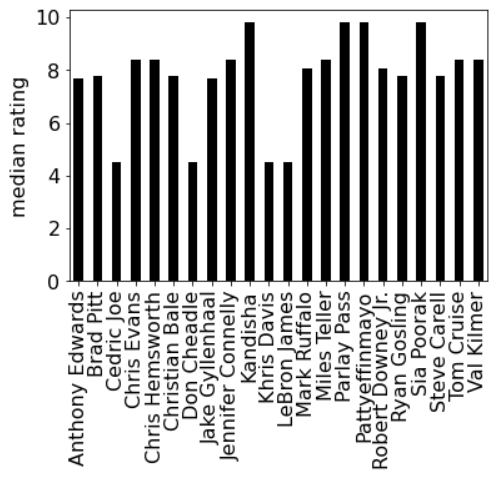</div>

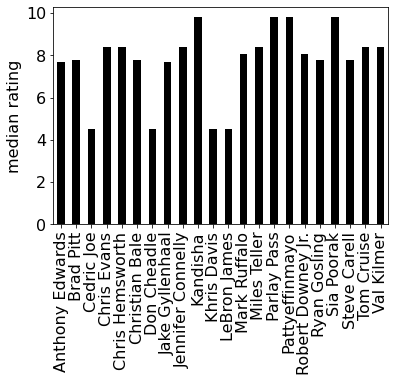

In [174]:
# plot 'median_ratings_by_cast' with the y-axis labelled 'median rating'
plot_dict(median_ratings_by_cast, "median rating")

In [175]:
grader.check("q17-2")

q17-2 results: All test cases passed!

**Question 18.1**: Create a new **dictionary** where the **key** is a `cast` member and the **value** is the **maximum** `rating` among all of their movies.

You **must** use **dictionary comprehension** to answer this question.

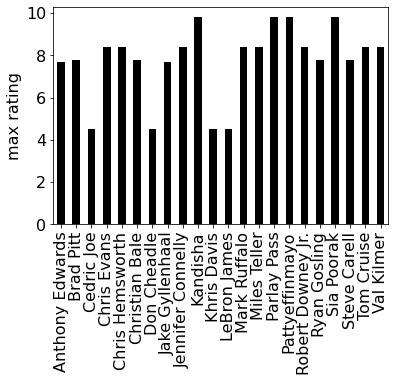

In [176]:
# compute and store the answer in the variable 'max_ratings_by_cast', then display it
max_ratings_by_cast = {cast_member:max(ratings_by_cast[cast_member]) for cast_member in ratings_by_cast}
plot_dict(max_ratings_by_cast, "max rating")

In [177]:
grader.check("q18-1")

q18-1 results: All test cases passed!

**Question 18.2**: What is the **maximum** `rating` of any movie starring *Mark Ruffalo*?

In [178]:
max_ratings_by_cast

{'Pattyeffinmayo': 9.8,
 'Parlay Pass': 9.8,
 'Sia Poorak': 9.8,
 'Kandisha': 9.8,
 'Robert Downey Jr.': 8.4,
 'Chris Hemsworth': 8.4,
 'Mark Ruffalo': 8.4,
 'Chris Evans': 8.4,
 'Jake Gyllenhaal': 7.7,
 'Anthony Edwards': 7.7,
 'Tom Cruise': 8.4,
 'Jennifer Connelly': 8.4,
 'Miles Teller': 8.4,
 'Val Kilmer': 8.4,
 'LeBron James': 4.5,
 'Don Cheadle': 4.5,
 'Cedric Joe': 4.5,
 'Khris Davis': 4.5,
 'Christian Bale': 7.8,
 'Steve Carell': 7.8,
 'Ryan Gosling': 7.8,
 'Brad Pitt': 7.8}

In [179]:
# compute and store the answer in the variable 'mark_ruffalo_max_rating', then display it
mark_ruffalo_max_rating = max_ratings_by_cast["Mark Ruffalo"]

In [180]:
grader.check("q18-2")

q18-2 results: All test cases passed!

**Question 19**: **Plot** a bar graph of the **maximum** `rating` of each `cast` member.

You **must** plot the **dictionary** `max_ratings_by_cast` to answer this question.

**Important Warning:** `practice_test.py` and `p9_test.py` can check that the **dictionary** has the correct key/value pairs, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots in p9 will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:
<div><img src="attachment:max_rating.PNG" width="400"/></div>

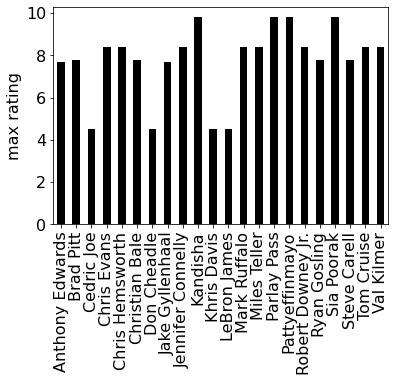

In [181]:
# plot 'max_ratings_by_cast' with the y-axis labelled 'maximum rating'
plot_dict(max_ratings_by_cast, "max rating")

In [182]:
grader.check("q19")

q19 results: All test cases passed!

**Question 20**: Which `cast` member's **maximum** `rating` is the **lowest**?

There will be **multiple** `cast` members having the **same** **lowest** `rating` so you will have to make a **list** containing **all** these names.

In [ ]:
# compute and store the answer in the variable 'lowest_max_rated_cast', then display it


In [ ]:
grader.check("q20")

## Great work! You are now ready to start p9.